In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


El disco estelar tiene la siguiente densidad
$$\begin{equation}
\rho_{d}(R,z) = \Sigma_{d} e^{-R/R_{d}} (\frac{\alpha_{0}}{2z_{0}} e^{-|z|/z_{0}} + \frac{\alpha_{1}}{2z_{1}} e^{-|z|/z_{1}})
\end{equation}$$

donde $\alpha_{0} + \alpha_{1} = 1$, $\Sigma_{d}$ es la densidad superficial central, $R_{d}$ es la longitud de escala del disco, y $z_{0} = 0.3kpc$ y $z_{1} = 1kpc$

$$\begin{equation}
\frac{2\rho_{d}z_{0}}{\Sigma_{d}}  = e^{R/R_{d}} (e^{-|z|/z_{0}} - \alpha_{1} e^{-|z|/z_{0}} + \frac{\alpha_{1}z_{0}}{z_{1}}e^{-|z|/z_{1}})
\end{equation}$$

In [2]:
alpha_0 = 0.5
def densidad_d(R,z,R_d=2000.,z_0=0.3e03,z_1=1000.,alpha_1=1.-alpha_0):
    return np.exp(R/R_d)*(np.exp(-abs(z)/z_0) -alpha_1*np.exp(-abs(z)/z_0) + ((alpha_1*z_0)/z_1)*np.exp(-abs(z)/z_1))

In [3]:
R = np.linspace(0.,15.,100)
z = np.linspace(0.,15.,100)

In [4]:
U_d=(2.*0.3e03)

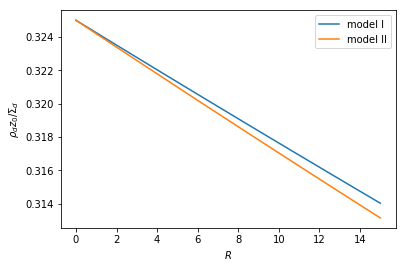

In [5]:
plt.plot(R, densidad_d(R,z)/2.,label='model I')
plt.plot(R, densidad_d(R,z,R_d=3.2e03)/2.,label='model II')
plt.xlabel(r'$R$')
plt.ylabel(r'$\rho_{d}z_{0}/\Sigma_{d}$')
plt.legend(loc='upper right', prop={'size':10})
#ylim(0.,0.05)
plt.show()

Después de hacer cambio de variables, el potencial para esta componente queda de la siguiente forma 
$$\begin{equation}
\frac{-\Phi2z_{0}}{4G\Sigma_{d}R_{d}} = E\int_{0}^{\infty} dx x K_{0}(x) \sin^{-1}(\frac{2R_{d}x}{\sqrt{(z-z')^{2} + (R_{d}x + R)^{2}} + \sqrt{(z-z')^{2} + (R_{d}x - R)^{2}}})
\end{equation}$$
donde $K_{0}(x)$ es una función modificada de Bessel y $E = \int_{0}^{\infty} dz (e^{-|z|/z_0} - \alpha_{1}e^{-|z|/z_{0}} + \frac{\alpha_{1}z_{0}}{z_{1}} e^{-|z|/z_{1}})$

donde sabemos que la velocidad circular está dada por 
$$\begin{equation}
v_{c}^{2} = R\frac{\partial \Phi}{\partial R}
\end{equation}$$
donde notamos que el único termino que depende de R es el $\sin^{-1}$ por lo que la velocidad circular queda de la siguiente forma 
$$\begin{equation}
\frac{v_{c}^{2}z_{0}}{4G\Sigma_{d}R_{d}} = R E \int_{0}^{\infty} dx x^{2}K_{0}(x) \frac{(\frac{(z-z')^{2}}{(R_{d}x + R)^{2}} + 1)^{-1/2} - (\frac{(z-z')^{2}}{(R_{d}x-R)^{2}} + 1)^{-1/2}}{d\sqrt{d^{2} - 4R_{d}^{2}x^{2}}}
\end{equation}$$
donde $d = (\sqrt{(z-z')^{2} + (R_{d}x+R)^{2}} + \sqrt{(z-z')^{2} + (R_{d}x-R)^{2}})$ y $E$ es la integral descrita anteriormente.

In [6]:
from scipy.special import kn

In [8]:
def prueba(x,z,R,R_d=2.0e03,z_p=0.,z_0=0.3e03,z_1=1.0e03,alpha_1=0.5):
    E = np.exp(-abs(z)/z_0) - alpha_1*np.exp(-abs(z)/z_0) + (alpha_1*z_0/z_1)*np.exp(-abs(z)/z_1)
    num = R*E*x**2.*kn(0,x)
    d = np.sqrt((z-z_p)**2. + (R_d*x+R)**2.) + np.sqrt((z-z_p)**2. + (R_d*x - R)**2.)
    den = d*np.sqrt(d**2. -4.*R_d**2.* x**2.)*np.sqrt(((z-z_p)/(R_d*x +R))**2.+1.)
    return num/den

In [9]:
def prueba_1(x,z,R,R_d=2.0e03,z_p=0.,z_0=0.3e03,z_1=1.0e03,alpha_1=0.5):
    E = np.exp(-abs(z)/z_0) - alpha_1*np.exp(-abs(z)/z_0) + (alpha_1*z_0/z_1)*np.exp(-abs(z)/z_1)
    num = R*E*x**2.*kn(0,x)
    d = np.sqrt((z-z_p)**2. + (R_d*x+R)**2.) + np.sqrt((z-z_p)**2. + (R_d*x - R)**2.)
    den = d*np.sqrt(d**2. -4.*R_d**2.* x**2.)*np.sqrt(((z-z_p)/(R_d*x -R))**2.+1.)
    return -num/den

In [18]:
def I_d_I(x,z,R,R_d=2.0e03,z_p=0.,z_0=0.3e03,z_1=1.0e03,alpha_1=0.5):
    E = np.exp(-abs(z)/z_0) - alpha_1*np.exp(-abs(z)/z_0) + (alpha_1*z_0/z_1)*np.exp(-abs(z)/z_1)
    d = np.sqrt((z-z_p)**2. + (R_d*x+R)**2.) + np.sqrt((z-z_p)**2. + (R_d*x - R)**2.)
    den_1 = d*np.sqrt(d**2. -4.*R_d**2.* x**2.)*np.sqrt(((z-z_p)/(R_d*x +R))**2.+1.)
    num = R*E*x**2.*kn(0,x)
    t1 = num/den_1
    den_2 = d*np.sqrt(d**2. -4.*R_d**2.* x**2.)*np.sqrt(((z-z_p)/(R_d*x -R))**2.+1.)
    t2 = num/den_2
    return t1-t2
def I_d_II(x,z,R,R_d=3.2e03,z_p=0.,z_0=0.3e03,z_1=1.0e03,alpha_1=0.5):
    E = np.exp(-abs(z)/z_0) - alpha_1*np.exp(-abs(z)/z_0) + (alpha_1*z_0/z_1)*np.exp(-abs(z)/z_1)
    d = np.sqrt((z-z_p)**2. + (R_d*x+R)**2.) + np.sqrt((z-z_p)**2. + (R_d*x - R)**2.)
    den_1 = d*np.sqrt(d**2. -4.*R_d**2.* x**2.)*np.sqrt(((z-z_p)/(R_d*x +R))**2.+1.)
    num = R*E*x**2.*kn(0,x)
    t1 = num/den_1
    den_2 = d*np.sqrt(d**2. -4.*R_d**2.* x**2.)*np.sqrt(((z-z_p)/(R_d*x -R))**2.+1.)
    t2 = num/den_2
    return t1-t2

In [13]:
p = []
for i in range (0,len(R)):
    integrando = lambda z,x: prueba_1(x,z,R[i])
    result = integrate.dblquad(integrando,0,np.inf,lambda x: 0.1, lambda x: 10)[0]
    p.append(result)
print p

[-3.719209227616302e-05, -9.316807005509046e-05, -0.00014914393716269607, -0.0002051196639565905, -0.00026109522143804914, -0.0003170705580490169, -0.00037304561563727794, -0.00042902072659546664, -0.0004849957592405062, -0.000540970522847283, -0.0005969450476243686, -0.0006529192923344423, -0.0007088904468768768, -0.0007648661279878386, -0.0008208392840800764, -0.000876811967066235, -0.0009327846040638415, -0.0009887561578106644, -0.0010447270605620695, -0.0011006979260102592, -0.001156669494580964, -0.001212639533531603, -0.0012686089770946802, -0.0013245777749943458, -0.001380546025295808, -0.0014365150961899748, -0.001492482090470131, -0.001548452368103157, -0.0016044248123391275, -0.001660392054037981, -0.0017163449014063958, -0.0017723105645975506, -0.0018282768195779983, -0.0018842420240448357, -0.0019402045368378616, -0.0019961707362995233, -0.002052128439279242, -0.002108089443874638, -0.0021640499775353868, -0.002220004103765681, -0.0022759630315500683, -0.0023319210428994286

In [10]:
R = np.linspace(0.1,15.,100)

In [11]:
from scipy import integrate

In [19]:
def Vc_ad_d_I(l):
    Integral_d = []
    for i in range (0,len(l)):
        integrando = lambda z,x: I_d_I(x,z,l[i])
        result = integrate.dblquad(integrando,0,np.inf,lambda x: 0.1, lambda x: 10)[0]
        Integral_d.append(result)
    return np.sqrt(Integral_d)
def Vc_ad_d_II(l):
    Integral_d = []
    for i in range (0,len(l)):
        integrando = lambda z,x: I_d_II(x,z,l[i])
        result = integrate.dblquad(integrando,0,np.inf,lambda x: 0.1, lambda x: 10)[0]
        Integral_d.append(result)
    return np.sqrt(Integral_d)

In [23]:
G = 4.302e-3
z_0 = 0.3e03
r_b2_I = 4.0e06
r_b2_II = 10.24e06
Sigma_d_I = 1905.*0.75
Sigma_d_II = 536.*0.75
C = 4.*G/z_0
print C

5.736e-05


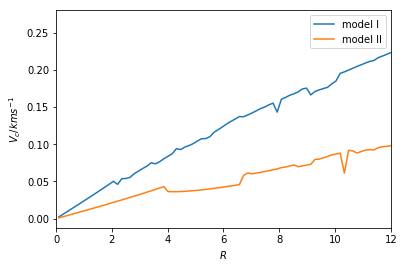

In [24]:
plt.plot(R,np.sqrt(C*r_b2_I*Sigma_d_I)*Vc_ad_d_I(R),label='model I')
plt.plot(R,np.sqrt(C*r_b2_II*Sigma_d_II)*Vc_ad_d_II(R),label='model II')
xlim(0.,12.)
plt.xlabel(r'$R$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='upper right', prop={'size':10})
plt.show()